<a href="https://colab.research.google.com/github/jofmorenore/Spatial_Clustering/blob/main/Hierarchical_clustering_of_spatially_correlated_fd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuración del entorno R en colab

In [ ]:
# https://stackoverflow.com/questions/74283327/conversion-py2rpy-not-defined-for-objects-of-type-class-str
!pip install rpy2==3.5.1

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
getwd()

[1] "/content"


In [ ]:
%%R
sessionInfo()

R version 4.3.0 (2023-04-21)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/liblapack.so.3;  LAPACK version 3.9.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] tools     stats     graphics  grDevices utils     datasets  methods  
[8] base     

loaded via a namespace (and not attached):
[1] compiler_4.3.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# “Canadian temperature” data (Ramsey & Silverman)

In [ ]:
%%R
library(dplyr)
library(ggplot2)

In [ ]:
%%R
if("geofd" %in% row.names(installed.packages())==FALSE){suppressMessages(install.packages("geofd"))}
library(geofd)

In [ ]:
%%R
if("sf" %in% row.names(installed.packages())==FALSE){suppressMessages(install.packages("sf"))}
library(sf)

In [ ]:
%%R
if("doSNOW" %in% row.names(installed.packages())==FALSE){suppressMessages(install.packages("doSNOW"))}
library(doSNOW)

In [ ]:
%%R
if("foreach" %in% row.names(installed.packages())==FALSE){suppressMessages(install.packages("foreach"))}
library(foreach)

In [ ]:
%%R
mundoshp <- sf::st_read("/content/drive/MyDrive/Curso/admin00.shp",quiet=TRUE)
Canada <- mundoshp %>% 
            filter(CNTRY_NAME %in% c("Canada"))
str(Canada, max.level = 1)

Classes ‘sf’ and 'data.frame':	13 obs. of  13 variables:
 $ FIPS_ADMIN: chr  "CA13" "CA12" "CA05" "CA09" ...
 $ GMI_ADMIN : chr  "CAN-NTR" "CAN-YTR" "CAN-NWF" "CAN-PEI" ...
 $ ADMIN_NAME: chr  "Northwest Territories" "Yukon Territory" "Newfoundland" "Prince Edward Island" ...
 $ FIPS_CNTRY: chr  "CA" "CA" "CA" "CA" ...
 $ GMI_CNTRY : chr  "CAN" "CAN" "CAN" "CAN" ...
 $ CNTRY_NAME: chr  "Canada" "Canada" "Canada" "Canada" ...
 $ POP_ADMIN : int  27928 28927 591593 135042 936538 7176389 27500 1136345 2649068 1029142 ...
 $ TYPE_ENG  : chr  "Territory" "Territory" "Province" "Province" ...
 $ TYPE_LOC  : chr  "Territory" "Territory" "Province" "Province" ...
 $ SQKM      : num  1338703 481287 396928 5959 55051 ...
 $ SQMI      : num  516873 185825 153254 2301 21255 ...
 $ COLOR_MAP : chr  "1" "8" "11" "7" ...
 $ geometry  :sfc_MULTIPOLYGON of length 13; first list element: List of 25
  ..- attr(*, "class")= chr [1:3] "XY" "MULTIPOLYGON" "sfg"
 - attr(*, "sf_column")= chr "geometry"
 - att

In [ ]:
%%R
data(CanadianWeather, package="fda")
str(CanadianWeather, max.level = 1)

List of 8
 $ dailyAv      : num [1:365, 1:35, 1:3] -3.6 -3.1 -3.4 -4.4 -2.9 -4.5 -5.5 -3.1 -4 -5 ...
  ..- attr(*, "dimnames")=List of 3
 $ place        : chr [1:35] "St. Johns" "Halifax" "Sydney" "Yarmouth" ...
 $ province     : Named chr [1:35] "Newfoundland" "Nova Scotia" "Nova Scotia" "Nova Scotia" ...
  ..- attr(*, "names")= chr [1:35] "St. Johns" "Halifax" "Sydney" "Yarmouth" ...
 $ coordinates  : num [1:35, 1:2] 47.3 44.4 46.1 43.5 42.5 ...
  ..- attr(*, "dimnames")=List of 2
 $ region       : Named chr [1:35] "Atlantic" "Atlantic" "Atlantic" "Atlantic" ...
  ..- attr(*, "names")= chr [1:35] "St. Johns" "Halifax" "Sydney" "Yarmouth" ...
 $ monthlyTemp  : num [1:12, 1:35] -4.65 -5.33 -2.53 1.26 5.79 ...
  ..- attr(*, "dimnames")=List of 2
 $ monthlyPrecip: num [1:12, 1:35] 4.65 4.74 4.24 3.62 3.25 ...
  ..- attr(*, "dimnames")=List of 2
 $ geogindex    : Named num [1:35] 24 9 25 34 4 8 22 1 2 19 ...
  ..- attr(*, "names")= chr [1:35] "St. Johns" "Halifax" "Sydney" "Yarmouth" ...


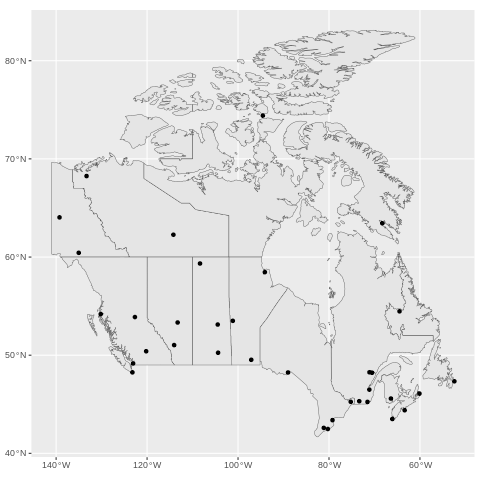

In [ ]:
%%R
CanadianWeather_coordinates = as.data.frame(CanadianWeather$coordinates) %>% mutate(W.longitude = -W.longitude) %>%
                          st_as_sf(coords = c("W.longitude", "N.latitude"), crs = 4326)

ggplot() + 
  geom_sf(data = Canada) +
  geom_sf(data = CanadianWeather_coordinates, col = 'black') 

NULL


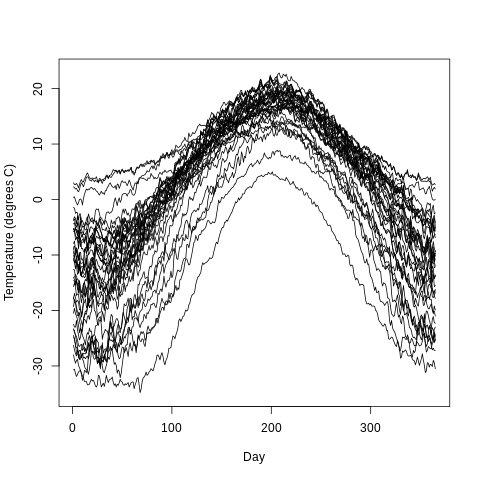

In [ ]:
%%R
plot(CanadianWeather$dailyAv[,1,'Temperature.C'], type = 'l', ylab = 'Temperature (degrees C)', xlab = 'Day', ylim =c(-35,23))
apply(CanadianWeather$dailyAv[,-1,'Temperature.C'], 2, function(x) lines(x))

# Smooth the observed data using [geodf](https://cran.r-project.org/web/packages/geofd/geofd.pdf)

A Fourier basis with 65 functions is used to smooth the discrete temperature values observed at each weather station

[1] "done"


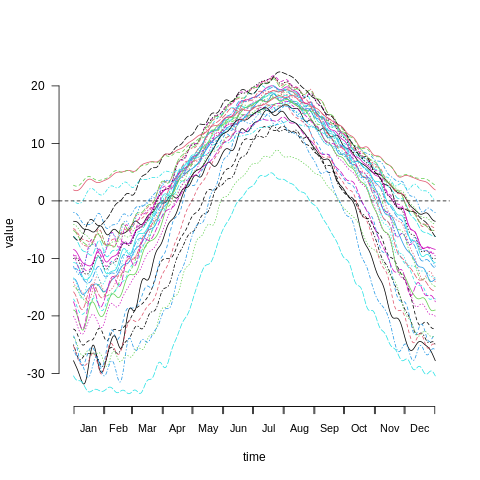

In [ ]:
%%R
### functional response with vector explanatory variables
daybasis65 <- create.fourier.basis(rangeval=c(0, 365), nbasis=65, period = 365,
                                   axes=list('axesIntervals'))
Temp.fd <- with(CanadianWeather, smooth.basisPar(day.5,
                                                 dailyAv[,,'Temperature.C'], daybasis65)$fd)

plot(Temp.fd)

# Convertir a coordenadas planas

+ [Overview of Coordinate Reference Systems (CRS) in R by NCEAS, University of California, Santa Barbara](https://www.nceas.ucsb.edu/sites/default/files/2020-04/OverviewCoordinateReferenceSystems.pdf)
+ [Lesson 5. GIS in R: Understand EPSG, WKT and other CRS definition styles by Earth Lab at University of Colorado, Boulder](https://www.earthdatascience.org/courses/earth-analytics/spatial-data-r/understand-epsg-wkt-and-other-crs-definition-file-types/)
+ [NGS Coordinate Conversion and Transformation Tool (NCAT) by National Geodetic Survey](https://www.ngs.noaa.gov/NCAT/)

In [ ]:
%%R
head(CanadianWeather_coordinates)

Simple feature collection with 6 features and 0 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -80.25 ymin: 42.48 xmax: -52.43 ymax: 47.34
Geodetic CRS:  WGS 84
              geometry
1 POINT (-52.43 47.34)
2 POINT (-63.36 44.39)
3 POINT (-60.11 46.09)
4  POINT (-66.07 43.5)
5 POINT (-80.25 42.48)
6 POINT (-66.39 45.58)


In [ ]:
%%R
# https://github.com/ajstamm/gatpkg/blob/master/R/convertlatlong2UTM.R
convertlatlong2UTM <- function(area, units = 'm') {
  # temporary sf conversion
  area <- sf::st_as_sf(area)
  bounds <- sf::st_bbox(area)
  lat = mean(bounds[c(2, 4)]) # latitude
  long = mean(bounds[c(1, 3)]) # longitude
  # find UTM hemisphere (latitude)
  hemisphere <- ifelse(lat > 0, "north", "south")
  # find UTM zone
  zone <- (floor((long + 180) / 6) %% 60) + 1
  crs <- paste0("+proj=utm +zone=", zone, " +datum=WGS84 +ellps=WGS84 +", hemisphere,
                " +units=", units, " +no_defs")
  return(crs)
}

In [ ]:
%%R
CanadianWeather_planar = matrix(NA, nr=nrow(CanadianWeather_coordinates), nc=2)

for(i in 1:nrow(CanadianWeather_coordinates)){
    CanadianWeather_planar[i,] = CanadianWeather_coordinates[i,] %>% 
                                        st_transform(crs = convertlatlong2UTM(CanadianWeather_coordinates[i,])) %>% 
                                        st_coordinates() 
}

CanadianWeather_planar = as.data.frame(CanadianWeather_planar) %>% `colnames<-`(c("W.longitude", "N.latitude"))
head(CanadianWeather_planar)

  W.longitude N.latitude
1    391975.9    5243940
2    471327.0    4915254
3    723412.8    5108108
4    736879.4    4820512
5    561644.4    4703345
6    703620.6    5050698


# Remove the spatial trend

Consider the functional linear model

$$ X_i(t) = \hat{\alpha}(t) + \hat{\alpha}_1(t) {Longitude}_i + \hat{\alpha}_2(t) {Latitude}_i + e_i(t) $$

+ Modelo de regresión función con las coordenadas planas en metros

In [ ]:
%%R
TempRgn.f <- fRegress(Temp.fd ~ W.longitude + N.latitude, CanadianWeather_planar)
fdobj.res = TempRgn.f$yfdobj-TempRgn.f$yhatfdobj
summary(TempRgn.f)

+ Modelo de regresión funcional con las coordenadas en grados decimales

In [ ]:
%%R
TempRgn.f2 <- fRegress(Temp.fd ~ W.longitude + N.latitude, data.frame(CanadianWeather$coordinates))
fdobj.res2 = TempRgn.f2$yfdobj-TempRgn.f2$yhatfdobj
summary(TempRgn.f2)

## Residuales del modelo

In [ ]:
%%R
#res.fd = smooth.fdPar(fdobj.res, Lfdobj=NULL, lambda=1e-4,estimate=TRUE, penmat=NULL)
res.fd = smooth.fdPar(fdobj.res, 
                      Lfdobj=vec2Lfd(c(0,(2*pi/diff(fdobj.res$basis$rangeval))^2,0), fdobj.res$basis$rangeval), 
                      lambda=1, estimate=TRUE, penmat=NULL)

res.fd2 = smooth.fdPar(fdobj.res2, 
                      Lfdobj=vec2Lfd(c(0,(2*pi/diff(fdobj.res2$basis$rangeval))^2,0), fdobj.res2$basis$rangeval), 
                      lambda=1, estimate=TRUE, penmat=NULL)

In [ ]:
%%R
jpeg("Fig2.jpg", width = 1600, height = 900)
par(mfrow=c(1,2))
plot(fdobj.res, lty=1, col=8,
     main="residual functions", xlab="Day", ylab="Temperature (Degrees C)")
plot(fdobj.res2, lty=1, col=8,
     main="Smoothed residual functions", xlab="Day", ylab="Temperature (Degrees C)")
dev.off()

png 
  2 


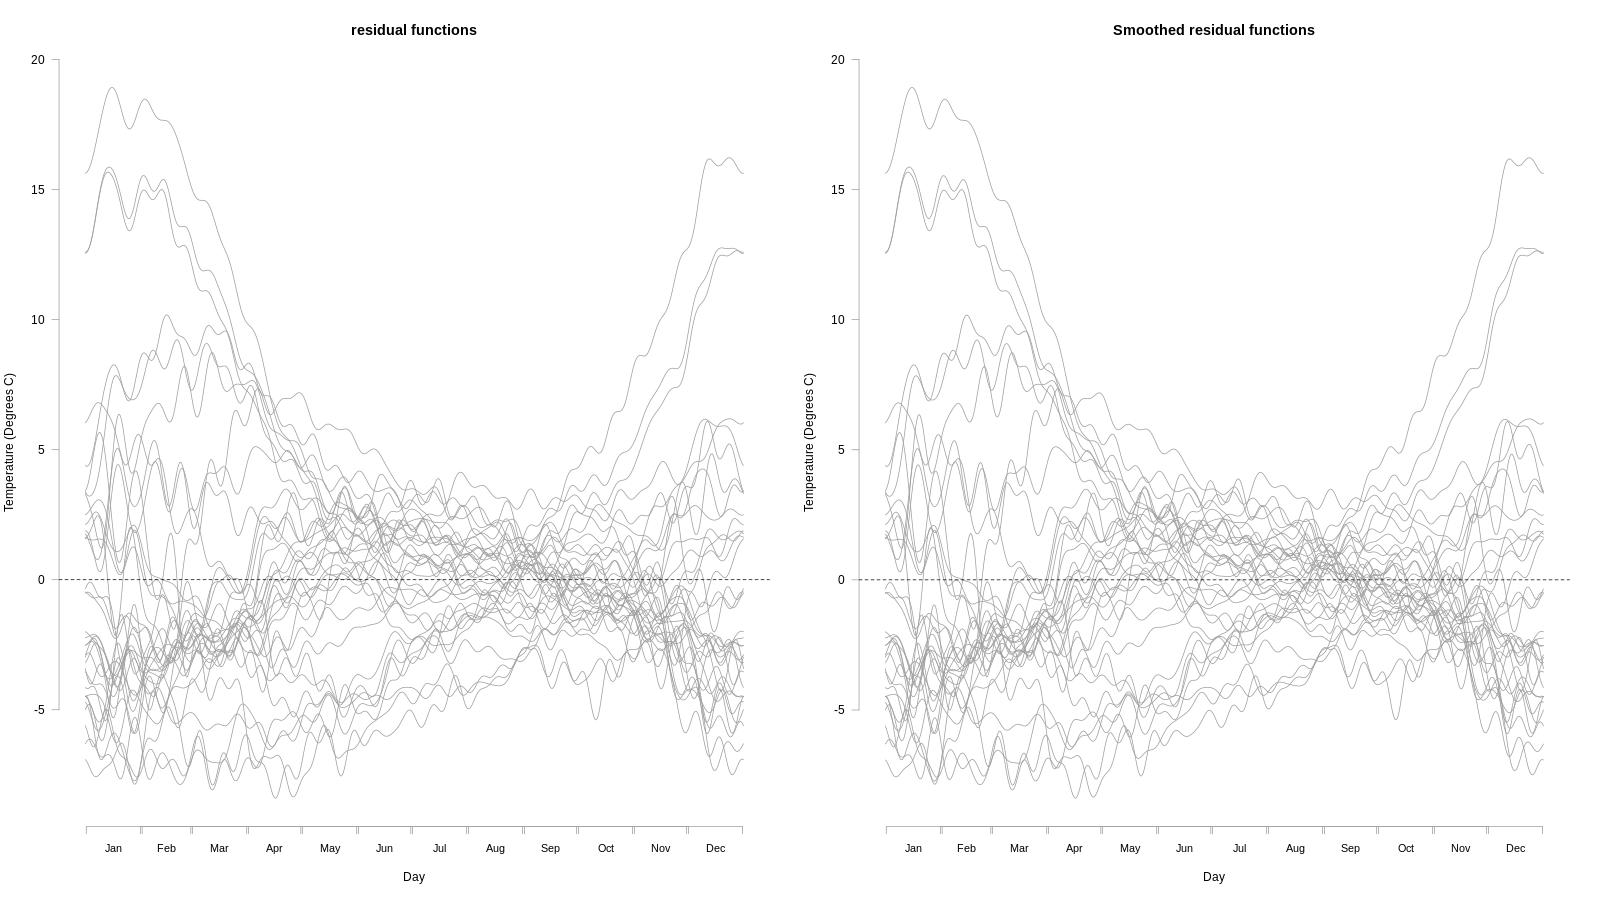

In [ ]:
%%R
#coord.cero <- matrix(c(-64.06, 45.79),nrow=1,ncol=2)
coord.cero <- matrix(c(-64.06, 45.79),nrow=1,ncol=2) %>% as.data.frame() %>% 
                `colnames<-`(c("W.longitude", "N.latitude")) %>% 
                st_as_sf(coords = c("W.longitude", "N.latitude"), crs = 4326) %>% 
                st_transform(crs=convertlatlong2UTM(.)) %>% 
                st_coordinates() 

print(head(coord.cero))
cat(rep('#',40), '\n')
head(CanadianWeather_planar)

            X       Y
[1,] 417611.9 5071262
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
  W.longitude N.latitude
1    391975.9    5243940
2    471327.0    4915254
3    723412.8    5108108
4    736879.4    4820512
5    561644.4    4703345
6    703620.6    5050698


Arroja error al correr el krigging ordinario con las siguientes especificaciones:

+ `coord.cero` transformadas a coordenadas planas y `CanadianWeather_planar`
+ `coord.cero` en grados decimales y `CanadianWeather_planar`

El error que arroja es: 
```
Error in solve.default(leftmatrix, rightmatrix) : 
## system is computationally singular: reciprocal condition number = 2.36899e-19
```

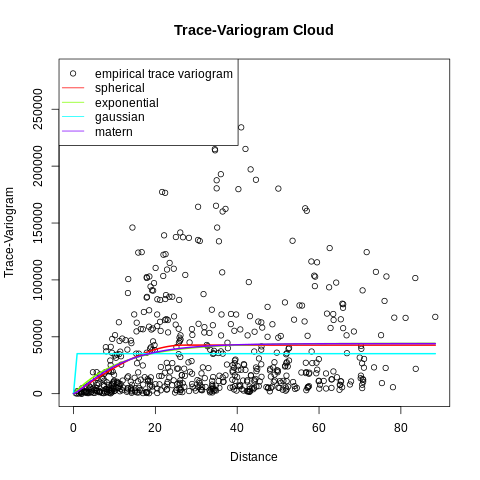

In [ ]:
%%R
coord.cero <- matrix(c(-64.06, 45.79),nrow=1,ncol=2)
okfd.res<-okfd(new.coords=coord.cero, coords=CanadianWeather$coordinates,
               data=CanadianWeather$dailyAv[,,'Temperature.C'], 
               smooth.type='fourier',nbasis=65, argvals=day.5, 
               fix.nugget=TRUE, kappa=0.7)
plot(okfd.res)

In [ ]:
%%R
str(okfd.res$emp.trace.vari)

List of 6
 $ u          : num [1:595(1d)] 11.32 7.78 14.17 28.24 14.07 ...
 $ v          : num [1:595(1d)] 2122 898 1954 2278 4931 ...
 $ output.type: chr "cloud"
 $ max.dist   : num 88.4
 $ Eu.d       : num [1:35, 1:35] 0 11.32 7.78 14.17 28.24 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:35] "St. Johns" "Halifax" "Sydney" "Yarmouth" ...
  .. ..$ : chr [1:35] "St. Johns" "Halifax" "Sydney" "Yarmouth" ...
 $ L2norm     : num [1:35, 1:35] 0 2122 898 1954 2278 ...
 - attr(*, "class")= chr "variogram"


# trace.variog

## Coordenadas planas

### usando los residuales de la regresión funcional (covariables en coordenadas planas) para calcular L2norm

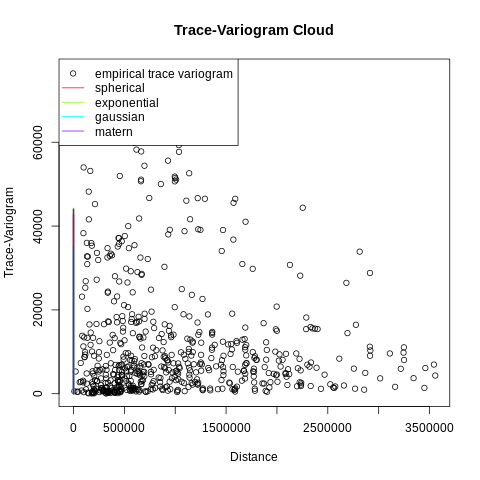

In [ ]:
%%R
M <- fourierpen(fdobj.res$basis,  Lfdobj=0)

L2norm = l2.norm(ncol(fdobj.res$coefs), res.fd, M)

new.emp.trace.vari1 <- trace.variog(coords=CanadianWeather_planar,
                                   L2norm=L2norm, bin=FALSE)

okfd.res$emp.trace.vari <- new.emp.trace.vari1
plot(okfd.res)

In [ ]:
%%R
str(new.emp.trace.vari)

List of 6
 $ u          : num [1:595(1d)] 338129 358191 546122 566595 366694 ...
 $ v          : num [1:595(1d)] 2634 1833 2142 9040 7254 ...
 $ output.type: chr "cloud"
 $ max.dist   : num 3556668
 $ Eu.d       : num [1:35, 1:35] 0 338129 358191 546122 566595 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:35] "1" "2" "3" "4" ...
  .. ..$ : chr [1:35] "1" "2" "3" "4" ...
 $ L2norm     : num [1:35, 1:35] 0 2634 1833 2142 9040 ...
 - attr(*, "class")= chr "variogram"


In [ ]:
%%R
sigma2 = c(seq(25, 5000, by=100), seq(5025, 15000, by=200))
phi    = c(seq(17, 1000, by=20), seq(1100, 11000, by=200))

In [ ]:
%%R
par_estimate = data.frame(list("sigma2_ini"=NA, "phi_ini"=NA, "partial sill"=NA, "range"=NA))
k=1

for(i in 1:100){
    for(j in 1:100){
        fit1 = geofd::fit.tracevariog(new.emp.trace.vari, models = "spherical", 
                                      sigma2.0 = sigma2[i], phi.0 = phi[j],
                                      fix.nugget=TRUE, fix.kappa=FALSE, 
                                      max.dist.variogram=NULL)
        par_estimate[k,]= c(sigma2[i], phi[j], fit1$best$cov.pars)
        k = k+1
    }
}

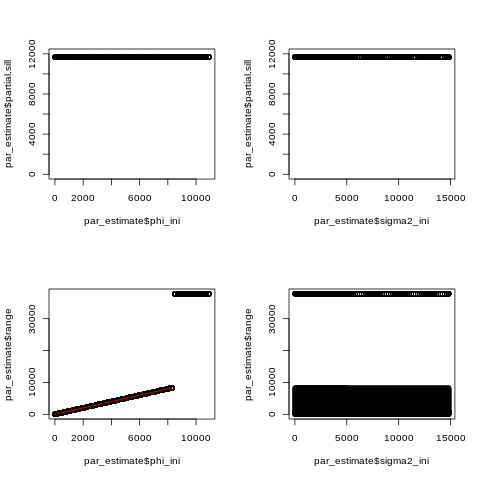

In [ ]:
%%R
par(mfrow=c(2,2))
# sin importar los valores iniciales de sigma2 y phi la sill estimada es 11658-11683
plot(par_estimate$phi_ini, par_estimate$partial.sill, ylim = c(0,12000))
plot(par_estimate$sigma2_ini, par_estimate$partial.sill, ylim = c(0,12000))
# A partir phi_ini=8500, cambia el rango estimado, pasa de ser el mismo phi_ini a 37793-37805
plot(par_estimate$phi_ini, par_estimate$range)
lines(x = seq(1,8500), y = seq(1,8500), col = 'red')
plot(par_estimate$sigma2_ini, par_estimate$range)

### usando los residuales de la regresión funcional (coordenadas en grados decimales) para calcular L2norm

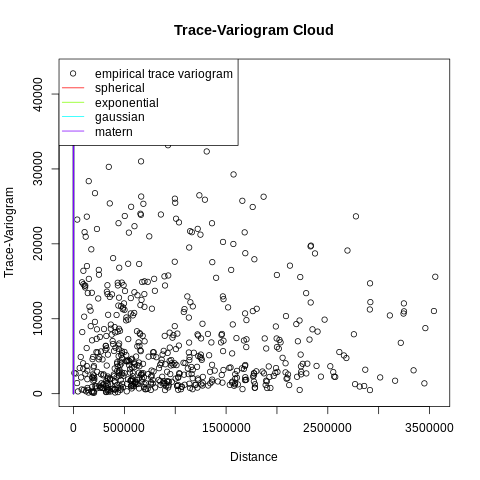

In [ ]:
%%R
M <- fourierpen(fdobj.res2$basis,  Lfdobj=0)

L2norm2 = l2.norm(ncol(fdobj.res2$coefs), res.fd2, M)

new.emp.trace.vari2 <- trace.variog(coords=CanadianWeather_planar,
                                   L2norm=L2norm2, bin=FALSE)

okfd.res$emp.trace.vari <- new.emp.trace.vari2
plot(okfd.res)

In [ ]:
%%R
par_estimate2 = data.frame(list("sigma2_ini"=NA, "phi_ini"=NA, "partial sill"=NA, "range"=NA))
k=1

for(i in 1:100){
    for(j in 1:100){
        fit2 = geofd::fit.tracevariog(new.emp.trace.vari, models = "spherical", 
                                      sigma2.0 = sigma2[i], phi.0 = phi[j],
                                      fix.nugget=TRUE, fix.kappa=FALSE, 
                                      max.dist.variogram=NULL)
        par_estimate2[k,]= c(sigma2[i], phi[j], fit2$best$cov.pars)
        k = k+1
    }
}

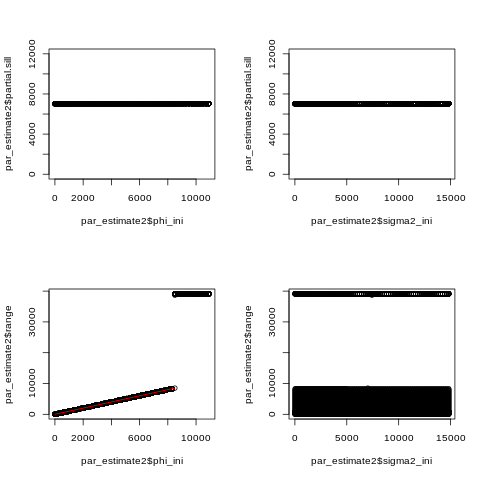

In [ ]:
%%R
par(mfrow=c(2,2))
# sin importar los valores iniciales de sigma2 y phi la sill estimada es 7023-7035
plot(par_estimate2$phi_ini, par_estimate2$partial.sill, ylim = c(0,12000))
plot(par_estimate2$sigma2_ini, par_estimate2$partial.sill, ylim = c(0,12000))
# A partir phi_ini=8500, cambia el rango estimado, pasa de ser el mismo phi_ini a 39081-39110
plot(par_estimate2$phi_ini, par_estimate2$range)
lines(x = seq(1,8500), y = seq(1,8500), col = 'red')
plot(par_estimate2$sigma2_ini, par_estimate2$range)

## Coordenadas en grados

### converge a $(sill=8090, range=22.09)$ usando los residuales de la regresión funcional (coordenadas en grados decimales) para calcular L2norm

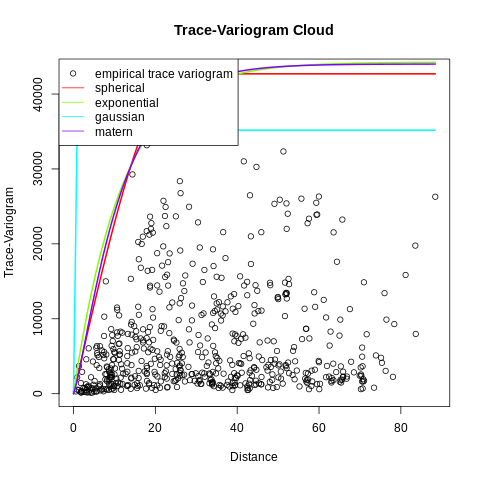

In [ ]:
%%R
M <- fourierpen(fdobj.res2$basis,  Lfdobj=0)

L2norm = l2.norm(ncol(fdobj.res2$coefs), res.fd2, M)

new.emp.trace.vari3 <- trace.variog(coords=CanadianWeather$coordinates,
                                   L2norm=L2norm, bin=FALSE)

okfd.res$emp.trace.vari <- new.emp.trace.vari3
plot(okfd.res)

#### valores iniciales en una grilla 50x50

In [ ]:
%%R
sigma2 = c(seq(5025, 15000, by=200))
phi    = c(seq(1100, 6000, by=100))

In [ ]:
%%R
par_estimate3 = data.frame(list("sigma2_ini"=NA, "phi_ini"=NA, "partial sill"=NA, "range"=NA))
k=1

for(i in 1:50){
    for(j in 1:50){
        fit3 = geofd::fit.tracevariog(new.emp.trace.vari, models = "spherical", 
                                      sigma2.0 = sigma2[i], phi.0 = phi[j],
                                      fix.nugget=TRUE, fix.kappa=FALSE, 
                                      max.dist.variogram=NULL)
        par_estimate3[k,]= c(sigma2[i], phi[j], fit3$best$cov.pars)
        k = k+1
    }
}

In [ ]:
%%R
range(par_estimate3$range[par_estimate3$range>0])

[1] 22.09385 22.09574


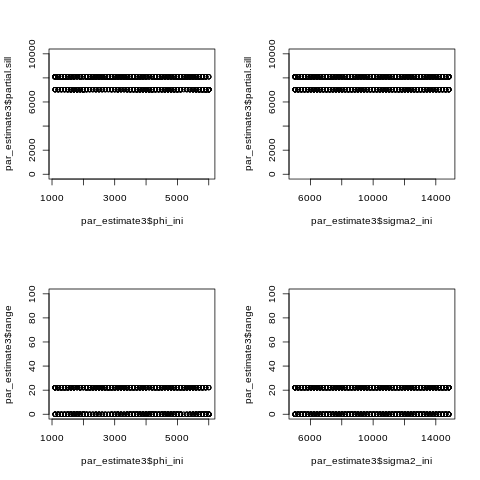

In [ ]:
%%R
par(mfrow=c(2,2))
# sin importar los valores iniciales de sigma2 y phi la sill estimada es 7023-8090
plot(par_estimate3$phi_ini, par_estimate3$partial.sill, ylim = c(0,10000))
plot(par_estimate3$sigma2_ini, par_estimate3$partial.sill, ylim = c(0,10000))
# para algunas combinaciones es cero, y para otras combinaciones converge a 22.093-22.095
plot(par_estimate3$phi_ini, par_estimate3$range, ylim = c(0,100))
plot(par_estimate3$sigma2_ini, par_estimate3$range, ylim = c(0,100))

In [ ]:
%%R
filter(par_estimate3, range>0) %>% dplyr::select(partial.sill) %>% range()

[1] 8089.818 8090.271


In [ ]:
%%R
set.seed(190523)
filter(par_estimate3, range>0) %>% mutate(idx = 1:nrow(.)) %>% 
  filter(idx %in% sample(idx, size = 3, replace = FALSE))

  sigma2_ini phi_ini partial.sill    range idx
1       6425    2600     8090.012 22.09439 241
2       6625    2700     8090.030 22.09440 272
3      10825    1100     8090.004 22.09438 964


#### evaluando valores iniciales alrededor de los estimados en el paper

In [ ]:
%%R
sigma2 = c(seq(7497, length.out = 30, by=17))
phi    = c(seq(1960, length.out = 30, by=14))
#c(sigma2[17],phi[17])

In [ ]:
%%R
par_estimate31 = data.frame(list("sigma2_ini"=NA, "phi_ini"=NA, "partial sill"=NA, "range"=NA))
k=1

for(i in 1:30){
    for(j in 1:30){
        fit31 = geofd::fit.tracevariog(new.emp.trace.vari, models = "spherical", 
                                      sigma2.0 = sigma2[i], phi.0 = phi[j],
                                      fix.nugget=TRUE, fix.kappa=FALSE, 
                                      max.dist.variogram=NULL)
        par_estimate31[k,]= c(sigma2[i], phi[j], fit31$best$cov.pars)
        k = k+1
    }
}

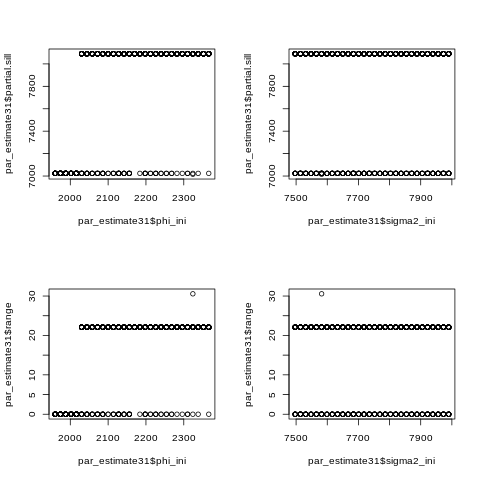

In [ ]:
%%R
par(mfrow=c(2,2))
# sin importar los valores iniciales de sigma2 y phi la sill estimada es 7016-8090
plot(par_estimate31$phi_ini, par_estimate31$partial.sill)
plot(par_estimate31$sigma2_ini, par_estimate31$partial.sill)
# para algunas combinaciones es cero, y para otras combinaciones converge a 22.094-22.095
plot(par_estimate31$phi_ini, par_estimate31$range)
plot(par_estimate31$sigma2_ini, par_estimate31$range)

In [ ]:
%%R
filter(par_estimate31, range>0 & range<30) %>% dplyr::select(range) %>% range()

[1] 22.09415 22.09519


In [ ]:
%%R
cat(rep('#', 30),  '\n')
cat('los valores iniciales son los valores estimados del paper \n')
print(filter(par_estimate31, sigma2_ini == 7769, phi_ini == 2184))
cat(rep('#', 30),  '\n')
# muestra de valores iniciales con estimación del rango distinta de cero
set.seed(190523)
filter(par_estimate31, range >0) %>% mutate(idx = 1:nrow(.)) %>% 
  filter(idx %in% sample(idx, size = 3, replace = FALSE))

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
los valores iniciales son los valores estimados del paper 
  sigma2_ini phi_ini partial.sill    range
1       7769    2184     8090.011 22.09439
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
  sigma2_ini phi_ini partial.sill    range idx
1       7667    2310     8089.997 22.09430 241
2       7701    2156     8090.007 22.09439 272
3       7820    2156     8090.007 22.09439 436


### converge a $(sill=18343, range=62.30)$ usando los residuales de la regresión funcional (covariables en coordenadas planas) para calcular L2norm

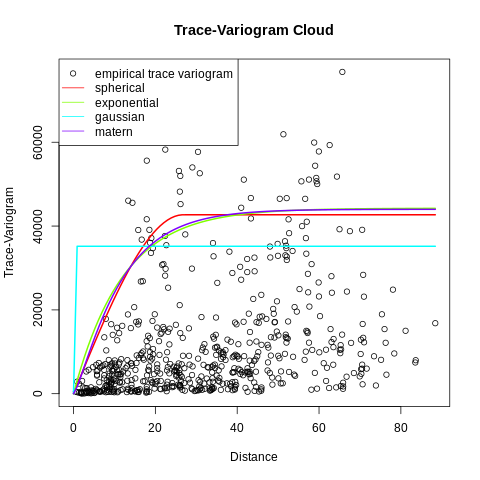

In [ ]:
%%R
M <- fourierpen(fdobj.res$basis,  Lfdobj=0)
L2norm = l2.norm(ncol(fdobj.res$coefs), res.fd, M)

new.emp.trace.vari4 <- trace.variog(coords=CanadianWeather$coordinates,
                                   L2norm=L2norm, bin=FALSE)

okfd.res$emp.trace.vari <- new.emp.trace.vari4
plot(okfd.res)

In [ ]:
%%R
str(new.emp.trace.vari)

List of 6
 $ u          : num [1:595(1d)] 11.32 7.78 14.17 28.24 14.07 ...
 $ v          : num [1:595(1d)] 2634 1833 2142 9040 7254 ...
 $ output.type: chr "cloud"
 $ max.dist   : num 88.4
 $ Eu.d       : num [1:35, 1:35] 0 11.32 7.78 14.17 28.24 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:35] "St. Johns" "Halifax" "Sydney" "Yarmouth" ...
  .. ..$ : chr [1:35] "St. Johns" "Halifax" "Sydney" "Yarmouth" ...
 $ L2norm     : num [1:35, 1:35] 0 2634 1833 2142 9040 ...
 - attr(*, "class")= chr "variogram"


#### valores iniciales en una grilla 50x50

In [ ]:
%%R
sigma2 = c(seq(5025, 15000, by=200))
phi    = c(seq(1100, 6000, by=100))

In [ ]:
%%R
par_estimate4 = data.frame(list("sigma2_ini"=NA, "phi_ini"=NA, "partial sill"=NA, "range"=NA))
k=1

for(i in 1:50){
    for(j in 1:50){
        fit4 = geofd::fit.tracevariog(new.emp.trace.vari, models = "spherical", 
                                      sigma2.0 = sigma2[i], phi.0 = phi[j],
                                      fix.nugget=TRUE, fix.kappa=FALSE, 
                                      max.dist.variogram=NULL)
        par_estimate4[k,]= c(sigma2[i], phi[j], fit4$best$cov.pars)
        k = k+1
    }
}

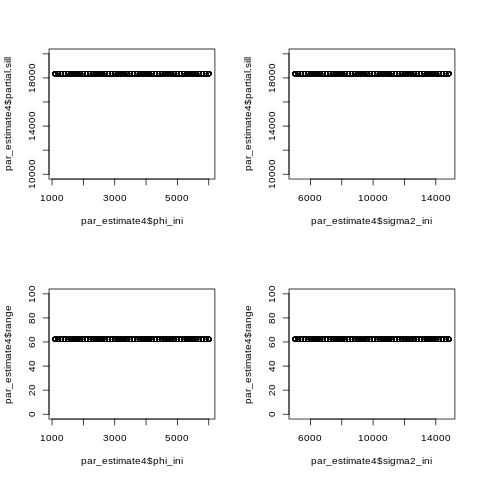

In [ ]:
%%R
par(mfrow=c(2,2))
# sin importar los valores iniciales de sigma2 y phi la sill estimada es 18342-18344
plot(par_estimate4$phi_ini, par_estimate4$partial.sill, ylim =c(10000,20000))
plot(par_estimate4$sigma2_ini, par_estimate4$partial.sill, ylim =c(10000,20000))
# A partir phi_ini=8500, cambia el rango estimado, pasa de ser el mismo phi_ini a 62.30-62.31
plot(par_estimate4$phi_ini, par_estimate4$range, ylim = c(0,100))
plot(par_estimate4$sigma2_ini, par_estimate4$range, ylim = c(0,100))

In [ ]:
%%R
# muestra de valores iniciales con estimación del rango distinta de cero
set.seed(190523)
filter(par_estimate4, range >0) %>% mutate(idx = 1:nrow(.)) %>% 
  filter(idx %in% sample(idx, size = 3, replace = FALSE))

  sigma2_ini phi_ini partial.sill    range  idx
1       5825    5100     18343.61 62.30560  241
2       6025    3200     18343.61 62.30560  272
3      14425    6000     18343.57 62.30522 2400


#### evaluando valores iniciales alrededor de los estimados en el paper

In [ ]:
%%R
sigma2 = c(seq(7497, length.out = 30, by=17))
phi    = c(seq(1960, length.out = 30, by=14))

In [ ]:
%%R
par_estimate41 = data.frame(list("sigma2_ini"=NA, "phi_ini"=NA, "partial sill"=NA, "range"=NA))
k=1

for(i in 1:30){
    for(j in 1:30){
        fit41 = geofd::fit.tracevariog(new.emp.trace.vari, models = "spherical", 
                                      sigma2.0 = sigma2[i], phi.0 = phi[j],
                                      fix.nugget=TRUE, fix.kappa=FALSE, 
                                      max.dist.variogram=NULL)
        par_estimate41[k,]= c(sigma2[i], phi[j], fit41$best$cov.pars)
        k = k+1
    }
}

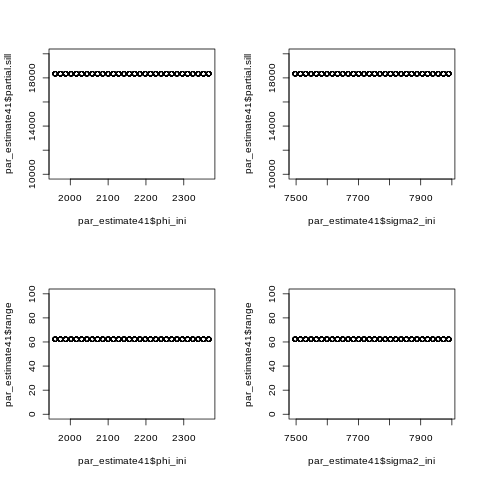

In [ ]:
%%R
par(mfrow=c(2,2))
# sin importar los valores iniciales de sigma2 y phi la sill estimada es 18343-18344
plot(par_estimate41$phi_ini, par_estimate41$partial.sill, ylim = c(10000, 20000))
plot(par_estimate41$sigma2_ini, par_estimate41$partial.sill, ylim = c(10000, 20000))
# A partir phi_ini=8500, cambia el rango estimado, pasa de ser el mismo phi_ini a 62.304-62.309
plot(par_estimate41$phi_ini, par_estimate41$range, ylim = c(0,100))
plot(par_estimate41$sigma2_ini, par_estimate41$range, ylim = c(0,100))

In [ ]:
%%R
cat(rep('#', 30), '\n')
cat('los valores iniciales son los valores estimados del paper \n')
print(filter(par_estimate41, sigma2_ini == 7769, phi_ini == 2184))
cat(rep('#', 30),  '\n')
# muestra de valores iniciales con estimación del rango distinta de cero
set.seed(190523)
filter(par_estimate41, range >0) %>% mutate(idx = 1:nrow(.)) %>% 
  filter(idx %in% sample(idx, size = 3, replace = FALSE))

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
los valores iniciales son los valores estimados del paper 
  sigma2_ini phi_ini partial.sill    range
1       7769    2184     18343.61 62.30557
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
  sigma2_ini phi_ini partial.sill    range idx
1       7633    1960     18343.61 62.30559 241
2       7650    1974     18343.61 62.30560 272
3       7905    2100     18343.52 62.30492 731


# [Clustering the “Canadian temperature” data (Ramsey & Silverman): multivariate case](https://rpubs.com/stat17_hb/functional_data_clustering)

In [ ]:
%%R
basis <- create.fourier.basis(c(0, 365), nbasis=21, period=365) 

daytempfd <- smooth.basis(day.5, CanadianWeather$dailyAv[,,"Temperature.C"], basis,
                          fdnames=list("Day", "Station", "Deg C"))$fd

dayprecfd <- smooth.basis(day.5, CanadianWeather$dailyAv[,,"Precipitation.mm"], basis,
                        fdnames=list("Day", "Station", "Mm"))$fd

In [ ]:
%%R
remotes::install_github("cran/funHDDC")
library(funHDDC)

In [ ]:
%%R
res.multi <- funHDDC(list(daytempfd,dayprecfd), K=4)

      model K threshold complexity       BIC
1 AKJBKQKDK 4       0.2        505 -8,189.95

SELECTED: model  AKJBKQKDK  with  4  clusters.
Selection Criterion: BIC.


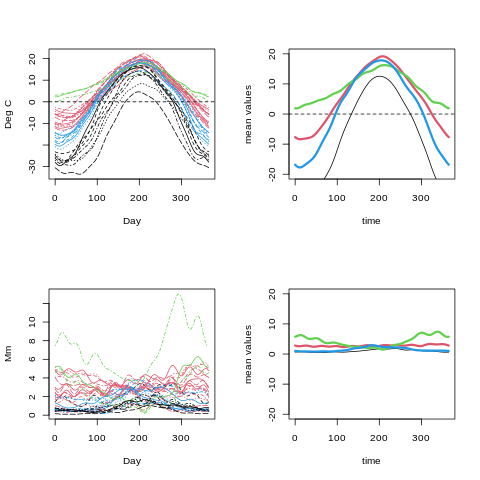

In [ ]:
%%R
## Graphical representation of groups mean curves
par(mfrow=c(2,2))

## Temperature
plot(daytempfd, col=res.multi$class, lwd=2, lty=1)
select1 <- fd(daytempfd$coefs[,which(res.multi$class==1)], daytempfd$basis)
select2 <- fd(daytempfd$coefs[,which(res.multi$class==2)], daytempfd$basis)
select3 <- fd(daytempfd$coefs[,which(res.multi$class==3)], daytempfd$basis)
select4 <- fd(daytempfd$coefs[,which(res.multi$class==4)], daytempfd$basis)

plot(mean.fd(select1),col=1, ylim=c(-20,20), lty=1, lwd=3)
lines(mean.fd(select2),col=2, lty=1,lwd=3)
lines(mean.fd(select3),col=3, lty=1,lwd=3)
lines(mean.fd(select4),col=4, lty=1,lwd=3)

## Precipitation
plot(dayprecfd, col=res.multi$class, lwd=2, lty=1)

select1b <- fd(dayprecfd$coefs[,which(res.multi$class==1)], dayprecfd$basis)
select2b <- fd(dayprecfd$coefs[,which(res.multi$class==2)], dayprecfd$basis)
select3b <- fd(dayprecfd$coefs[,which(res.multi$class==3)], dayprecfd$basis)
select4b <- fd(dayprecfd$coefs[,which(res.multi$class==4)], dayprecfd$basis)

plot(mean.fd(select1b),col=1, ylim=c(-20,20), lty=1, lwd=3)
lines(mean.fd(select2b),col=2, lty=1,lwd=3)
lines(mean.fd(select3b),col=3, lty=1,lwd=3)
lines(mean.fd(select4b),col=4, lty=1,lwd=3)

In [ ]:
%%R
colnames(daytempfd$coefs[,which(res.multi$class==1)])

[1] "Scheffervll"  "Churchill"    "Uranium City" "Dawson"       "Yellowknife" 
[6] "Iqaluit"      "Inuvik"       "Resolute"    


In [ ]:
%%R
CanadianWeather$place

 [1] "St. Johns"    "Halifax"      "Sydney"       "Yarmouth"     "Charlottvl"  
 [6] "Fredericton"  "Scheffervll"  "Arvida"       "Bagottville"  "Quebec"      
[11] "Sherbrooke"   "Montreal"     "Ottawa"       "Toronto"      "London"      
[16] "Thunder Bay"  "Winnipeg"     "The Pas"      "Churchill"    "Regina"      
[21] "Pr. Albert"   "Uranium City" "Edmonton"     "Calgary"      "Kamloops"    
[26] "Vancouver"    "Victoria"     "Pr. George"   "Pr. Rupert"   "Whitehorse"  
[31] "Dawson"       "Yellowknife"  "Iqaluit"      "Inuvik"       "Resolute"    


In [ ]:
%%R
data.frame(list("place"=colnames(daytempfd$coefs), "class"=res.multi$class)) %>% filter(class ==1)

         place class
1  Scheffervll     1
2    Churchill     1
3 Uranium City     1
4       Dawson     1
5  Yellowknife     1
6      Iqaluit     1
7       Inuvik     1
8     Resolute     1


In [ ]:
%%R
head(CanadianWeather.point)

Simple feature collection with 6 features and 0 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -80.25 ymin: 42.48 xmax: -52.43 ymax: 47.34
Geodetic CRS:  WGS 84
              geometry
1 POINT (-52.43 47.34)
2 POINT (-63.36 44.39)
3 POINT (-60.11 46.09)
4  POINT (-66.07 43.5)
5 POINT (-80.25 42.48)
6 POINT (-66.39 45.58)


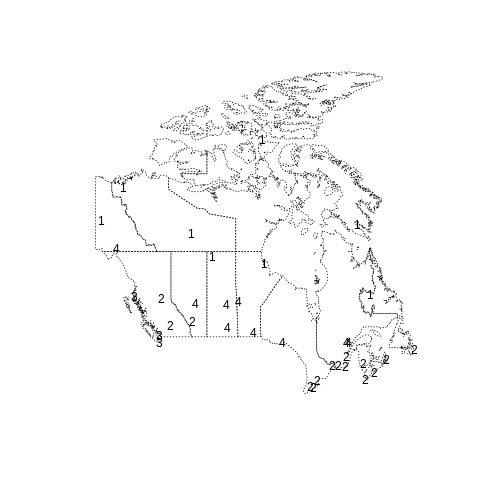

In [ ]:
%%R
plot(Canada$geometry, lty = 3)
plot(CanadianWeather.point, pch = as.character(res.multi$class), add = TRUE)